# 1. KNN Nearest Algorithm

## Exact Version

## 1. Imports

In [2]:
import numpy as np
from sklearn.datasets import make_classification

In [3]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


In [4]:
class KNN:
    def __init__(self, K=3):
        self.K = K
    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train

    def predict(self, X_test):
        predictions = [] 
        for i in range(len(X_test)):
            dist = np.array([euclidean_distance(X_test[i], x_t) for x_t in   
            self.X_train])
            dist_sorted = dist.argsort()[:self.K]
            neigh_count = {}
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += 1
                else:
                    neigh_count[self.Y_train[idx]] = 1
            sorted_neigh_count = sorted(neigh_count.items(),    
            key=operator.itemgetter(1), reverse=True)
            predictions.append(sorted_neigh_count[0][0]) 
        return predictions

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## use mnist as classification dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y.astype(np.int8)
subset_size = 100
X_subset, y_subset = X[:subset_size], y[:subset_size]

# Split the subset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

X_train = X_train.to_numpy(dtype='uint8')
X_test = X_test.to_numpy(dtype='uint8')
y_train = y_train.to_numpy(dtype='uint8')
y_test = y_test.to_numpy(dtype='uint8')

# Print statistics about the data
print("Number of training examples:", X_train.shape[0])
print("Number of testing examples:", X_test.shape[0])
print("Number of features:", X_train.shape[1])  # Assuming all samples have the same number of features
print("Number of classes:", len(set(y)))  # Count unique classes in the target variable



Number of training examples: 80
Number of testing examples: 20
Number of features: 784
Number of classes: 10


Shape of X_train: (80, 784)
Shape of y_train: (80,)


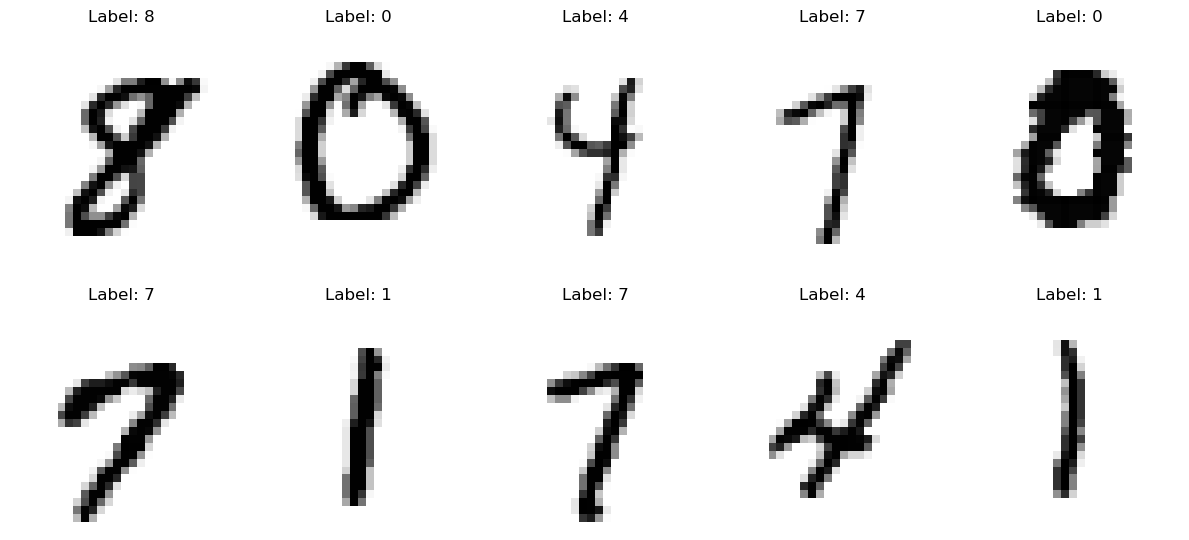

In [6]:
import matplotlib.pyplot as plt

# Check the shape of X_train and y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Visualize the first 10 samples of the dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    if i < len(X_train):
        ax.imshow(X_train[i].reshape(28, 28), cmap='binary')
        ax.set_title(f"Label: {y_train[i]}")
        ax.axis('off')
    else:
        ax.axis('off')  # Turn off the axis for empty subplots

plt.tight_layout()
plt.show()


## Exact Full Numpy KNN Version

K = 2 ; Accuracy: 0.25 mean_absolute_error: 89.1 mean_squared_error: 11.1 f1_score: 0.25
K = 3 ; Accuracy: 0.25 mean_absolute_error: 101.7 mean_squared_error: 11.1 f1_score: 0.25
K = 4 ; Accuracy: 0.1 mean_absolute_error: 226.2 mean_squared_error: 24.4 f1_score: 0.1
K = 5 ; Accuracy: 0.1 mean_absolute_error: 226.45 mean_squared_error: 21.65 f1_score: 0.1
K = 6 ; Accuracy: 0.1 mean_absolute_error: 226.0 mean_squared_error: 26.8 f1_score: 0.1
K = 7 ; Accuracy: 0.1 mean_absolute_error: 226.0 mean_squared_error: 26.8 f1_score: 0.1
K = 8 ; Accuracy: 0.1 mean_absolute_error: 226.0 mean_squared_error: 26.8 f1_score: 0.1
K = 9 ; Accuracy: 0.1 mean_absolute_error: 226.0 mean_squared_error: 26.8 f1_score: 0.1
K = 10 ; Accuracy: 0.1 mean_absolute_error: 226.0 mean_squared_error: 26.8 f1_score: 0.1
K = 11 ; Accuracy: 0.1 mean_absolute_error: 226.0 mean_squared_error: 26.8 f1_score: 0.1
K = 12 ; Accuracy: 0.1 mean_absolute_error: 226.0 mean_squared_error: 26.8 f1_score: 0.1


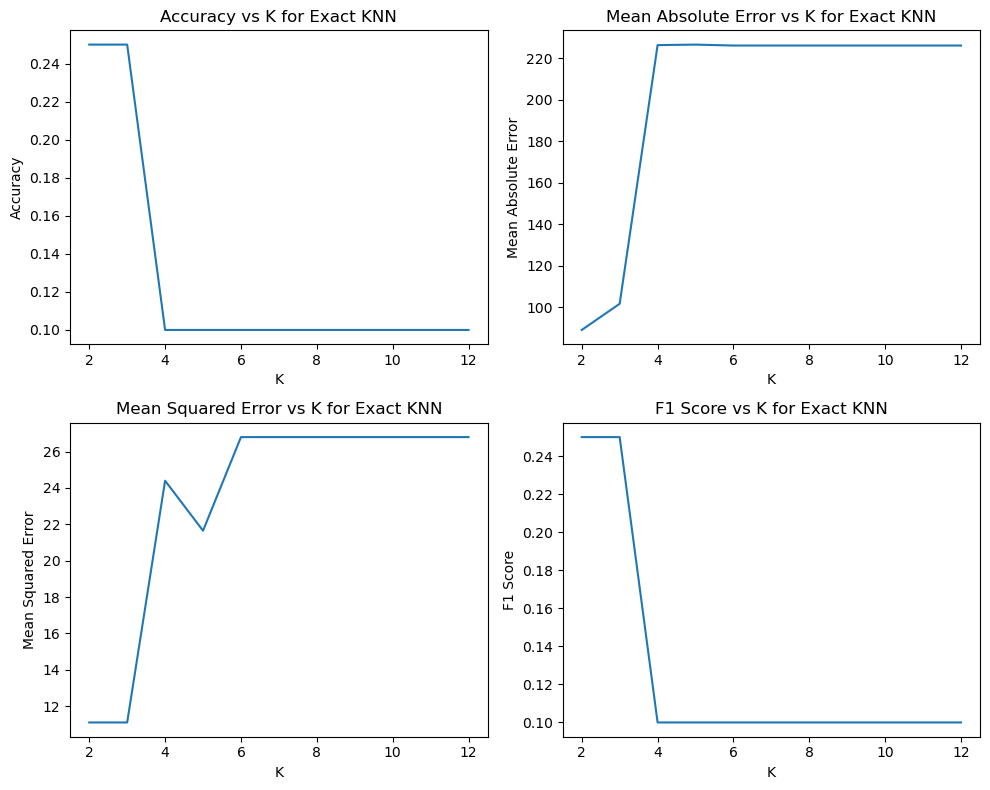

In [7]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error,f1_score,confusion_matrix
import operator
from operator import itemgetter
from joblib import Parallel, delayed
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, f1_score, confusion_matrix
import operator
from operator import itemgetter
from joblib import Parallel, delayed
import matplotlib.pyplot as plt


kVals = np.arange(2, 13, 1)
accuracies = []
mae_values = []
mse_values = []
f1_scores = []

for k in kVals:
    model = KNN(K=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    f1 = f1_score(y_test, pred, average='micro')
    accuracies.append(acc)
    mae_values.append(mae)
    mse_values.append(mse)
    f1_scores.append(f1)
    print("K =", k, "; Accuracy:", acc, "mean_absolute_error:", mae, "mean_squared_error:", mse, "f1_score:", f1)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot accuracy
axs[0, 0].plot(kVals, accuracies)
axs[0, 0].set_xlabel('K')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_title('Accuracy vs K for Exact KNN')

# Plot mean absolute error
axs[0, 1].plot(kVals, mae_values)
axs[0, 1].set_xlabel('K')
axs[0, 1].set_ylabel('Mean Absolute Error')
axs[0, 1].set_title('Mean Absolute Error vs K for Exact KNN')

# Plot mean squared error
axs[1, 0].plot(kVals, mse_values)
axs[1, 0].set_xlabel('K')
axs[1, 0].set_ylabel('Mean Squared Error')
axs[1, 0].set_title('Mean Squared Error vs K for Exact KNN')

# Plot F1 score
axs[1, 1].plot(kVals, f1_scores)
axs[1, 1].set_xlabel('K')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].set_title('F1 Score vs K for Exact KNN')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

  


## Approximated Version of KNN Algorithm on MNIST

### Approximated Adder Block

In [8]:
import operator
truth_table_approx = {
        (int("000",2), int("000",2), 0) : ("000", 0, 3524.43, 3),
        (int("000",2), int("000",2), 1) : ("001", 0, 3523.25, 3),
        (int("000",2), int("001",2), 0) : ("001", 0, 3550.87, 3),
        (int("000",2), int("001",2), 1) : ("010", 0, 3547.47, 3),
        (int("000",2), int("010",2), 0) : ("010", 0, 3524.43, 3),
        (int("000",2), int("010",2), 1) : ("011", 0, 3523.25, 3),
        (int("000",2), int("011",2), 0) : ("011", 0, 3550.87, 3),
        (int("000",2), int("011",2), 1) : ("100", 0, 3547.47, 3),
        (int("000",2), int("100",2), 0) : ("100", 0, 3569.85, 3),
        (int("000",2), int("100",2), 1) : ("101", 0, 3568.76, 3),
        (int("000",2), int("101",2), 0) : ("101", 0, 3595.61, 3),
        (int("000",2), int("101",2), 1) : ("110", 0, 3592.36, 3),
        (int("000",2), int("110",2), 0) : ("110", 0, 3569.85, 3),
        (int("000",2), int("110",2), 1) : ("111", 0, 3568.76, 3),
        (int("000",2), int("111",2), 0) : ("111", 0, 3595.61, 3),
        (int("000",2), int("111",2), 1) : ("000", 0, 3592.36, 3),
        (int("001",2), int("000",2), 0) : ("001", 0, 3414.19, 3),
        (int("001",2), int("000",2), 1) : ("010", 0, 3412.80, 3),
        (int("001",2), int("001",2), 0) : ("010", 0, 3441.17, 3),
        (int("001",2), int("001",2), 1) : ("011", 0, 3437.65, 3),
        (int("001",2), int("010",2), 0) : ("011", 0, 3414.19, 3),
        (int("001",2), int("010",2), 1) : ("100", 0, 3412.80, 3),
        (int("001",2), int("011",2), 0) : ("100", 0, 3441.17, 3),
        (int("001",2), int("011",2), 1) : ("101", 0, 3437.65, 3),
        (int("001",2), int("100",2), 0) : ("101", 0, 3459.54, 3),
        (int("001",2), int("100",2), 1) : ("110", 0, 3458.24, 3),
        (int("001",2), int("101",2), 0) : ("110", 0, 3485.88, 3),
        (int("001",2), int("101",2), 1) : ("111", 0, 3482.48, 3),
        (int("001",2), int("110",2), 0) : ("111", 0, 3459.54, 3),
        (int("001",2), int("110",2), 1) : ("000", 0, 3458.24, 3),
        (int("001",2), int("111",2), 0) : ("000", 0, 3485.88, 3),
        (int("001",2), int("111",2), 1) : ("001", 0, 3482.48, 3),
        (int("010",2), int("000",2), 0) : ("010", 0, 3461.63, 3),
        (int("010",2), int("000",2), 1) : ("011", 0, 3460.38, 3),
        (int("010",2), int("001",2), 0) : ("011", 0, 3488.08, 3),
        (int("010",2), int("001",2), 1) : ("100", 0, 3484.60, 3),
        (int("010",2), int("010",2), 0) : ("100", 1, 3461.63, 3),
        (int("010",2), int("010",2), 1) : ("101", 1, 3460.38, 3),
        (int("010",2), int("011",2), 0) : ("101", 1, 3488.08, 3),
        (int("010",2), int("011",2), 1) : ("110", 1, 3484.60, 3),
        (int("010",2), int("100",2), 0) : ("110", 0, 3507.03, 3),
        (int("010",2), int("100",2), 1) : ("111", 0, 3505.88, 3),
        (int("010",2), int("101",2), 0) : ("111", 0, 3532.81, 3),
        (int("010",2), int("101",2), 1) : ("000", 0, 3529.48, 3),
        (int("010",2), int("110",2), 0) : ("000", 1, 3507.03, 3),
        (int("010",2), int("110",2), 1) : ("001", 1, 3505.88, 3),
        (int("010",2), int("111",2), 0) : ("001", 1, 3532.81, 3),
        (int("010",2), int("111",2), 1) : ("010", 1, 3529.48, 3),
        (int("011",2), int("000",2), 0) : ("011", 0, 3141.21, 3),
        (int("011",2), int("000",2), 1) : ("100", 0, 3144.42, 3),
        (int("011",2), int("001",2), 0) : ("100", 0, 3376.36, 3),
        (int("011",2), int("001",2), 1) : ("101", 0, 3372.84, 3),
        (int("011",2), int("010",2), 0) : ("101", 1, 3349.38, 3),
        (int("011",2), int("010",2), 1) : ("110", 1, 3348.00, 3),
        (int("011",2), int("011",2), 0) : ("110", 1, 3376.36, 3),
        (int("011",2), int("011",2), 1) : ("111", 1, 3372.84, 3),
        (int("011",2), int("100",2), 0) : ("111", 0, 3394.73, 3),
        (int("011",2), int("100",2), 1) : ("000", 0, 3393.44, 3),
        (int("011",2), int("101",2), 0) : ("000", 0, 3421.07, 3),
        (int("011",2), int("101",2), 1) : ("001", 0, 3417.67, 3),
        (int("011",2), int("110",2), 0) : ("001", 1, 3394.73, 3),
        (int("011",2), int("110",2), 1) : ("010", 1, 3393.44, 3),
        (int("011",2), int("111",2), 0) : ("010", 1, 3421.07, 3),
        (int("011",2), int("111",2), 1) : ("011", 1, 3417.67, 3),
        (int("100",2), int("000",2), 0) : ("100", 0, 3504.00, 3),
        (int("100",2), int("000",2), 1) : ("101", 0, 3502.82, 3),
        (int("100",2), int("001",2), 0) : ("101", 0, 3530.44, 3),
        (int("100",2), int("001",2), 1) : ("110", 0, 3527.03, 3),
        (int("100",2), int("010",2), 0) : ("110", 0, 3504.00, 3),
        (int("100",2), int("010",2), 1) : ("111", 0, 3502.82, 3),
        (int("100",2), int("011",2), 0) : ("111", 0, 3530.44, 3),
        (int("100",2), int("011",2), 1) : ("000", 0, 3527.03, 3),
        (int("100",2), int("100",2), 0) : ("000", 0, 3549.41, 3),
        (int("100",2), int("100",2), 1) : ("001", 0, 3548.32, 3),
        (int("100",2), int("101",2), 0) : ("001", 0, 3575.18, 3),
        (int("100",2), int("101",2), 1) : ("010", 0, 3571.91, 3),
        (int("100",2), int("110",2), 0) : ("010", 0, 3549.41, 3),
        (int("100",2), int("110",2), 1) : ("011", 0, 3548.32, 3),
        (int("100",2), int("111",2), 0) : ("011", 0, 3575.18, 3),
        (int("100",2), int("111",2), 1) : ("100", 0, 3571.91, 3),
        (int("101",2), int("000",2), 0) : ("101", 0, 3393.75, 3),
        (int("101",2), int("000",2), 1) : ("110", 0, 3392.39, 3),
        (int("101",2), int("001",2), 0) : ("110", 0, 3420.57, 3),
        (int("101",2), int("001",2), 1) : ("111", 0, 3417.22, 3),
        (int("101",2), int("010",2), 0) : ("111", 0, 3393.75, 3),
        (int("101",2), int("010",2), 1) : ("000", 0, 3374.67, 3),
        (int("101",2), int("011",2), 0) : ("000", 0, 3420.74, 3),
        (int("101",2), int("011",2), 1) : ("001", 0, 3417.22, 3),
        (int("101",2), int("100",2), 0) : ("001", 0, 3439.11, 3),
        (int("101",2), int("100",2), 1) : ("010", 0, 3437.82, 3),
        (int("101",2), int("101",2), 0) : ("010", 0, 3465.42, 3),
        (int("101",2), int("101",2), 1) : ("011", 0, 3462.04, 3),
        (int("101",2), int("110",2), 0) : ("011", 0, 3439.11, 3),
        (int("101",2), int("110",2), 1) : ("100", 0, 3437.82, 3),
        (int("101",2), int("111",2), 0) : ("100", 0, 3465.42, 3),
        (int("101",2), int("111",2), 1) : ("101", 0, 3462.04, 3),
        (int("110",2), int("000",2), 0) : ("110", 0, 3437.23, 3),
        (int("110",2), int("000",2), 1) : ("111", 0, 3436.06, 3),
        (int("110",2), int("001",2), 0) : ("111", 0, 3463.69, 3),
        (int("110",2), int("001",2), 1) : ("000", 0, 3460.25, 3),
        (int("110",2), int("010",2), 0) : ("000", 1, 3437.23, 3),
        (int("110",2), int("010",2), 1) : ("001", 1, 3436.06, 3),
        (int("110",2), int("011",2), 0) : ("001", 1, 3480.91, 3),
        (int("110",2), int("011",2), 1) : ("010", 1, 3460.25, 3),
        (int("110",2), int("100",2), 0) : ("010", 0, 3482.64, 3),
        (int("110",2), int("100",2), 1) : ("011", 0, 3481.56, 3),
        (int("110",2), int("101",2), 0) : ("011", 0, 3508.42, 3),
        (int("110",2), int("101",2), 1) : ("100", 0, 3505.15, 3),
        (int("110",2), int("110",2), 0) : ("100", 1, 3482.64, 3),
        (int("110",2), int("110",2), 1) : ("101", 1, 3481.56, 3),
        (int("110",2), int("111",2), 0) : ("101", 1, 3508.42, 3),
        (int("110",2), int("111",2), 1) : ("110", 1, 3505.15, 3),
        (int("111",2), int("000",2), 0) : ("111", 0, 3328.96, 3),
        (int("111",2), int("000",2), 1) : ("000", 0, 3327.59, 3),
        (int("111",2), int("001",2), 0) : ("000", 0, 3355.95, 3),
        (int("111",2), int("001",2), 1) : ("001", 0, 3352.43, 3),
        (int("111",2), int("010",2), 0) : ("001", 1, 3328.96, 3),
        (int("111",2), int("010",2), 1) : ("010", 1, 3327.59, 3),
        (int("111",2), int("011",2), 0) : ("010", 1, 3355.95, 3),
        (int("111",2), int("011",2), 1) : ("011", 1, 3352.43, 3),
        (int("111",2), int("100",2), 0) : ("011", 0, 3374.32, 3),
        (int("111",2), int("100",2), 1) : ("100", 0, 3373.02, 3),
        (int("111",2), int("101",2), 0) : ("100", 0, 3400.63, 3),
        (int("111",2), int("101",2), 1) : ("101", 0, 3397.26, 3),
        (int("111",2), int("110",2), 0) : ("101", 1, 3374.32, 3),
        (int("111",2), int("110",2), 1) : ("110", 1, 3373.02, 3),
        (int("111",2), int("111",2), 0) : ("110", 1, 3400.63, 3),
        (int("111",2), int("111",2), 1) : ("111", 1, 3397.26, 3),
    }
truth_table_exact = {
        (int("000",2), int("000",2), 0) : ("000", 0, 3551.72, 3),
        (int("000",2), int("000",2), 1) : ("001", 0, 3548.19, 3),
        (int("000",2), int("001",2), 0) : ("001", 0, 3640.16, 3),
        (int("000",2), int("001",2), 1) : ("010", 0, 3641.45, 3),
        (int("000",2), int("010",2), 0) : ("010", 0, 3572.25, 3),
        (int("000",2), int("010",2), 1) : ("011", 0, 3574.59, 3),
        (int("000",2), int("011",2), 0) : ("011", 0, 3601.30, 3),
        (int("000",2), int("011",2), 1) : ("100", 0, 3598.35, 3),
        (int("000",2), int("100",2), 0) : ("100", 0, 3594.40, 3),
        (int("000",2), int("100",2), 1) : ("101", 0, 3590.86, 3),
        (int("000",2), int("101",2), 0) : ("101", 0, 3683.04, 3),
        (int("000",2), int("101",2), 1) : ("110", 0, 3684.34, 3),
        (int("000",2), int("110",2), 0) : ("110", 0, 3615.07, 3),
        (int("000",2), int("110",2), 1) : ("111", 0, 3617.43, 3),
        (int("000",2), int("111",2), 0) : ("111", 0, 3644.06, 3),
        (int("000",2), int("111",2), 1) : ("000", 1, 3641.10, 3),
        (int("001",2), int("000",2), 0) : ("001", 0, 3611.07, 3),
        (int("001",2), int("000",2), 1) : ("010", 0, 3607.71, 3),
        (int("001",2), int("001",2), 0) : ("010", 0, 3700.54, 3),
        (int("001",2), int("001",2), 1) : ("011", 0, 3701.81, 3),
        (int("001",2), int("010",2), 0) : ("011", 0, 3632.53, 3),
        (int("001",2), int("010",2), 1) : ("100", 0, 3634.89, 3),
        (int("001",2), int("011",2), 0) : ("100", 0, 3661.69, 3),
        (int("001",2), int("011",2), 1) : ("101", 0, 3658.71, 3),
        (int("001",2), int("100",2), 0) : ("101", 0, 3653.76, 3),
        (int("001",2), int("100",2), 1) : ("110", 0, 3650.40, 3),
        (int("001",2), int("101",2), 0) : ("110", 0, 3743.41, 3),
        (int("001",2), int("101",2), 1) : ("111", 0, 3744.68, 3),
        (int("001",2), int("110",2), 0) : ("111", 0, 3675.35, 3),
        (int("001",2), int("110",2), 1) : ("000", 1, 3677.70, 3),
        (int("001",2), int("111",2), 0) : ("000", 1, 3704.42, 3),
        (int("001",2), int("111",2), 1) : ("001", 1, 3701.46, 3),
        (int("010",2), int("000",2), 0) : ("010", 0, 3682.60, 3),
        (int("010",2), int("000",2), 1) : ("011", 0, 3679.01, 3),
        (int("010",2), int("001",2), 0) : ("011", 0, 3769.36, 3),
        (int("010",2), int("001",2), 1) : ("100", 0, 3770.75, 3),
        (int("010",2), int("010",2), 0) : ("100", 0, 3747.66, 3),
        (int("010",2), int("010",2), 1) : ("101", 0, 3750.02, 3),
        (int("010",2), int("011",2), 0) : ("101", 0, 3775.71, 3),
        (int("010",2), int("011",2), 1) : ("110", 0, 3772.90, 3),
        (int("010",2), int("100",2), 0) : ("110", 0, 3785.55, 3),
        (int("010",2), int("100",2), 1) : ("111", 0, 3781.98, 3),
        (int("010",2), int("101",2), 0) : ("111", 0, 3872.51, 3),
        (int("010",2), int("101",2), 1) : ("000", 1, 3873.88, 3),
        (int("010",2), int("110",2), 0) : ("000", 1, 3790.48, 3),
        (int("010",2), int("110",2), 1) : ("001", 1, 3792.83, 3),
        (int("010",2), int("111",2), 0) : ("001", 1, 3818.44, 3),
        (int("010",2), int("111",2), 1) : ("010", 1, 3815.64, 3),
        (int("011",2), int("000",2), 0) : ("011", 0, 3969.04, 3),
        (int("011",2), int("000",2), 1) : ("100", 0, 3660.23, 3),
        (int("011",2), int("001",2), 0) : ("100", 0, 3750.62, 3),
        (int("011",2), int("001",2), 1) : ("101", 0, 3752.01, 3),
        (int("011",2), int("010",2), 0) : ("101", 0, 3669.39, 3),
        (int("011",2), int("010",2), 1) : ("110", 0, 3671.75, 3),
        (int("011",2), int("011",2), 0) : ("110", 0, 3794.89, 3),
        (int("011",2), int("011",2), 1) : ("111", 0, 3694.62, 3),
        (int("011",2), int("100",2), 0) : ("111", 0, 3706.50, 3),
        (int("011",2), int("100",2), 1) : ("000", 1, 3702.94, 3),
        (int("011",2), int("101",2), 0) : ("000", 1, 3793.52, 3),
        (int("011",2), int("101",2), 1) : ("001", 1, 3794.89, 3),
        (int("011",2), int("110",2), 0) : ("001", 1, 3712.20, 3),
        (int("011",2), int("110",2), 1) : ("010", 1, 3714.56, 3),
        (int("011",2), int("111",2), 0) : ("010", 1, 3740.15, 3),
        (int("011",2), int("111",2), 1) : ("011", 1, 3737.35, 3),
        (int("100",2), int("000",2), 0) : ("100", 0, 3668.93, 3),
        (int("100",2), int("000",2), 1) : ("101", 0, 3665.54, 3),
        (int("100",2), int("001",2), 0) : ("101", 0, 3758.40, 3),
        (int("100",2), int("001",2), 1) : ("110", 0, 3759.66, 3),
        (int("100",2), int("010",2), 0) : ("110", 0, 3690.38, 3),
        (int("100",2), int("010",2), 1) : ("111", 0, 3692.74, 3),
        (int("100",2), int("011",2), 0) : ("111", 0, 3719.52, 3),
        (int("100",2), int("011",2), 1) : ("000", 1, 3716.58, 3),
        (int("100",2), int("100",2), 0) : ("000", 1, 3711.60, 3),
        (int("100",2), int("100",2), 1) : ("001", 1, 3708.24, 3),
        (int("100",2), int("101",2), 0) : ("001", 1, 3801.27, 3),
        (int("100",2), int("101",2), 1) : ("010", 1, 3802.55, 3),
        (int("100",2), int("110",2), 0) : ("010", 1, 3733.19, 3),
        (int("100",2), int("110",2), 1) : ("011", 1, 3735.56, 3),
        (int("100",2), int("111",2), 0) : ("011", 1, 3762.26, 3),
        (int("100",2), int("111",2), 1) : ("100", 1, 3759.31, 3),
        (int("101",2), int("000",2), 0) : ("101", 0, 3096.80, 3),
        (int("101",2), int("000",2), 1) : ("110", 0, 3587.29, 3),
        (int("101",2), int("001",2), 0) : ("110", 0, 3680.14, 3),
        (int("101",2), int("001",2), 1) : ("111", 0, 3681.80, 3),
        (int("101",2), int("010",2), 0) : ("111", 0, 3612.10, 3),
        (int("101",2), int("010",2), 1) : ("000", 1, 3614.46, 3),
        (int("101",2), int("011",2), 0) : ("000", 1, 3641.27, 3),
        (int("101",2), int("011",2), 1) : ("001", 1, 3638.32, 3),
        (int("101",2), int("100",2), 0) : ("001", 1, 3633.33, 3),
        (int("101",2), int("100",2), 1) : ("010", 1, 3629.94, 3),
        (int("101",2), int("101",2), 0) : ("010", 1, 3723.00, 3),
        (int("101",2), int("101",2), 1) : ("011", 1, 3724.28, 3),
        (int("101",2), int("110",2), 0) : ("011", 1, 3654.91, 3),
        (int("101",2), int("110",2), 1) : ("100", 1, 3657.28, 3),
        (int("101",2), int("111",2), 0) : ("100", 1, 3684.01, 3),
        (int("101",2), int("111",2), 1) : ("101", 1, 3681.04, 3),
        (int("110",2), int("000",2), 0) : ("110", 0, 3722.47, 3),
        (int("110",2), int("000",2), 1) : ("111", 0, 3718.90, 3),
        (int("110",2), int("001",2), 0) : ("111", 0, 3809.25, 3),
        (int("110",2), int("001",2), 1) : ("000", 1, 3810.61, 3),
        (int("110",2), int("010",2), 0) : ("000", 1, 3727.26, 3),
        (int("110",2), int("010",2), 1) : ("001", 1, 3729.61, 3),
        (int("110",2), int("011",2), 0) : ("001", 1, 3755.33, 3),
        (int("110",2), int("011",2), 1) : ("010", 1, 3752.51, 3),
        (int("110",2), int("100",2), 0) : ("010", 1, 3765.15, 3),
        (int("110",2), int("100",2), 1) : ("011", 1, 3761.61, 3),
        (int("110",2), int("101",2), 0) : ("011", 1, 3852.12, 3),
        (int("110",2), int("101",2), 1) : ("100", 1, 3853.48, 3),
        (int("110",2), int("110",2), 0) : ("100", 1, 3770.08, 3),
        (int("110",2), int("110",2), 1) : ("101", 1, 4125.72, 3),
        (int("110",2), int("111",2), 0) : ("101", 1, 3798.07, 3),
        (int("110",2), int("111",2), 1) : ("110", 1, 3795.24, 3),
        (int("111",2), int("000",2), 0) : ("111", 0, 3643.40, 3),
        (int("111",2), int("000",2), 1) : ("000", 1, 3639.85, 3),
        (int("111",2), int("001",2), 0) : ("000", 1, 3730.23, 3),
        (int("111",2), int("001",2), 1) : ("001", 1, 3731.62, 3),
        (int("111",2), int("010",2), 0) : ("001", 1, 3648.98, 3),
        (int("111",2), int("010",2), 1) : ("010", 1, 3651.33, 3),
        (int("111",2), int("011",2), 0) : ("010", 1, 3677.03, 3),
        (int("111",2), int("011",2), 1) : ("011", 1, 3674.22, 3),
        (int("111",2), int("100",2), 0) : ("011", 1, 3686.11, 3),
        (int("111",2), int("100",2), 1) : ("100", 1, 3682.53, 3),
        (int("111",2), int("101",2), 0) : ("100", 1, 3773.11, 3),
        (int("111",2), int("101",2), 1) : ("101", 1, 3774.49, 3),
        (int("111",2), int("110",2), 0) : ("101", 1, 3691.80, 3),
        (int("111",2), int("110",2), 1) : ("110", 1, 3694.16, 3),
        (int("111",2), int("111",2), 0) : ("110", 1, 3719.77, 3),
        (int("111",2), int("111",2), 1) : ("111", 1, 3716.96, 3),
    }

def approxAdder_3bit(a, b, c):
    
    sum_element, carry_over, energy, delay = truth_table_approx[a, b, c]
    return sum_element, carry_over, energy, delay

def exactAdder_3bit(a, b, c):
    

    sum_element, carry_over, energy, delay = truth_table_exact[a, b, c]
    #print(carry_over)
    return sum_element, carry_over, energy, delay


In [9]:
from functools import reduce

# ## Approximate Adder Function
#
# The output result deviates from the exact solution.
#



#In 8 Bit Adder, lower 3 bits are implemented approximated. Higher 5 Bit calculate exact
def My_12BitAdder(a,b,approx_until=1, nstages=4):
    a_bin = bin(a & ((1 << (nstages * 3)) - 1))[2:].zfill(nstages * 3)
    b_bin = bin(b & ((1 << (nstages * 3)) - 1))[2:].zfill(nstages * 3)

    # print(a_bin)
    # print(b_bin)

    #reverse order bits for the adder
    # rev_a , rev_b = list(a_bin[::-1]), list(b_bin[::-1])
    rev_a = [a_bin[i:i+3] for i in range(0, len(a_bin), 3)][::-1]
    rev_b = [b_bin[i:i+3] for i in range(0, len(b_bin), 3)][::-1]

    bit_vector = ""
    carry_over  = 0
    total_sum   = 0
    total_energy_consumption = 0
    total_delay = 0

    #we want to do a bitwise addition
    for index, (bit1, bit2) in enumerate( zip(rev_a, rev_b) ):

        if index < approx_until:
            #use approx_adder
            #print("used approx adder")
            sum_element, carry_over , _energy, _delay = approxAdder_3bit(int(bit1,2), int(bit2,2), int(carry_over) )             
            #print(sum_element)

        else:
            #use exact_adder
            #print("used exact adder")
            #print(bit1, bit2, carry_over)
            sum_element, carry_over, _energy,_delay = exactAdder_3bit(int(bit1,2), int(bit2,2), int(carry_over) )
            #print(sum_element)
            #print("carry ", carry_over)

        
        bit_vector = sum_element + bit_vector
        total_energy_consumption += _energy
        total_delay += _delay

    total_sum = int(bit_vector,2)

    if total_sum >= 2**((nstages * 3)-1):
        total_sum -= 2**(nstages * 3)
    return total_sum, total_energy_consumption, total_delay

def My_12BitSubtractor(a, b,nstages=4,approx_until=1):
    # convert to binary
    a_bin = bin(a & ((1 << (nstages * 3)) - 1))[2:].zfill(nstages * 3)
    b_bin = bin(b & ((1 << (nstages * 3)) - 1))[2:].zfill(nstages * 3)
    # calculate 2's complement of b
    b_bin = ''.join('1' if bit == '0' else '0' for bit in b_bin)
    b_bin = bin(int(b_bin, 2) + 1)[2:].zfill(nstages * 3)

    # add a and 2's complement of b
    result, energy ,delay= My_12BitAdder(int(a_bin, 2), int(b_bin, 2),approx_until=approx_until,nstages=nstages)

    return np.int16(result), energy, delay

def My_12BitMultiplier(a, b, approx_until=1,nstages=4):
    # Convert inputs to two's complement representation if negative
    a = a if a >= 0 else pow(2,nstages*3) + a
    b = b if b >= 0 else pow(2,nstages*3) + b

    total_result = 0
    total_energy_consumption = 0
    total_delay = 0
    
    for _ in range(b):

        total_result,energy,delay = My_12BitAdder(total_result,a,approx_until=approx_until,nstages=nstages)
        total_energy_consumption += energy
        total_delay += delay

    # Prevent overflow
    total_result = total_result if total_result < pow(2,nstages*3) else total_result - pow(2,nstages*3)

    return np.int16(total_result), total_energy_consumption, total_delay

# def My_16BitMultiplier(a, b, approx_until=3):
#      # Convert inputs to two's complement representation
#     a = a if a >= 0 else 65536 + a
#     b = b if b >= 0 else 65536 + b

#     total_result = 0
#     total_energy_consumption = 0
#     total_delay = 0
#     for _ in range(b):
#         result, energy_consumption, delay = My_16BitAdder(result, a, approx_until,nstages=nstages)
#         total_result += result
#         total_energy_consumption += energy_consumption
#         total_delay += delay

#     # Prevent overflow
#     result = result if result <= 65535 else result - 65536

#     # Check if result is negative and revert 2's complement
#     if result & (1 << 15):
#         result = -(65536 - result)

#     return total_result, total_energy_consumption, total_delay

# def My_16BitAdder(a,b,approx_until=1):
#     # convert to binary
#     a_bin, b_bin = bin(a)[2:], bin(b)[2:]

#     #reverse order of bytes for the adder
#     rev_a , rev_b = list(a_bin[::-1]), list(b_bin[::-1])
    
#     rev_a = rev_a + max(0, len(rev_b)-len(rev_a)) * [0]
#     rev_b = rev_b + max(0, len(rev_a)-len(rev_b)) * [0]

#     carry_over  = 0
#     total_sum   = 0

#     total_energy_consumption = 0

#     #we want to do a bitwise addition
#     for index, (bit1, bit2) in enumerate( zip(rev_a, rev_b) ):

#         if index < approx_until:
#             #use approx_adder
#             sum_element, carry_over , _energy = ApproxAdder(int(bit1,2), int(bit2,2), int(carry_over) ) 
#         else:
#             #use exact_adder
#             sum_element, carry_over, _energy = ExactAdder(int(bit1,2), int(bit2,2), int(carry_over) )
            
#         total_sum += pow(2,index)*sum_element
#         total_energy_consumption += _energy

#     total_sum += pow(2,index+1)*carry_over

#     # If there is an overflow, ignore it
#     if total_sum >= 65536:
#         total_sum -= 65536
#     return total_sum, total_energy_consumption




def euclidean_distance_approx(a, b, approx_until=1,KNNApprox=None):
    count = 0
    train_image_count = len(b)
    result = np.zeros_like(a)
    square_diff = np.zeros_like(a)
    sum_square_diff = 0
    for i in range(len(a)):
        count += 1
        result[i], energy_temp,delay_temp = My_12BitSubtractor(a[i], b[i], approx_until=approx_until, nstages=4)
        #print("difference is being calculated: ",result[i])
        KNNApprox.energy += energy_temp
        #print(energy_temp)
        KNNApprox.delay += delay_temp
        result[i], energy_temp, delay_temp = My_12BitMultiplier(result[i], result[i], approx_until=approx_until,nstages=4)
        #print("Power of 2 is being calculated: ",result[i])
        KNNApprox.energy += energy_temp
        #print(energy_temp)
        KNNApprox.delay += delay_temp
        #print("Elements left in actual test image", len(a) - count)
        sum_square_diff,energy_temp,delay_temp = My_12BitAdder(sum_square_diff, result[i], approx_until=approx_until, nstages=4)
    return np.sqrt(sum_square_diff)

class KNNApprox:
    def __init__(self, K=3,approx_until=1):
        self.K = K
        self.approx_until = approx_until
        self.energy = 0
        self.delay = 0
    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train
    def predict(self, X_test,approx_until=1):
        self.energy = 0
        self.delay = 0
        predictions = [] 
        for i in range(len(X_test)):
            dist= np.array([euclidean_distance_approx(X_test[i], x_t,approx_until=approx_until,KNNApprox=self) for x_t in   
        self.X_train])
            print("Element is being processed ",i)
            dist_sorted = dist.argsort()[:self.K]
            neigh_count = {}
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += 1
                else:
                    neigh_count[self.Y_train[idx]] = 1
            sorted_neigh_count = sorted(neigh_count.items(),    
            key=operator.itemgetter(1), reverse=True)
            predictions.append(sorted_neigh_count[0][0]) 
        return predictions, self.energy, self.delay

#sum, energy = My_8BitSubtractor(1,approx_until=0)
sum,energy,delay = My_12BitAdder(5,5,approx_until=0)
#sum,energy = My_8BitSubtractor(3,5,approx_until=0)
#My_16BitMultiplier(-3,3,approx_until=0)

#M_16BitAdder(256,256)


#My_8BitAdder(30,10,approx_until=0) 



In [13]:
import numpy as np
from joblib import Parallel, delayed
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def calculate_accuracy(k,approx_until):
    model = KNNApprox(K=k,approx_until=approx_until)
    model.fit(X_train, y_train)
    pred, energy_consumption, delay = model.predict(X_test,approx_until=approx_until)
    acc = accuracy_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    f1 = f1_score(y_test, pred, average='micro')
    del model
    return acc, mse, mae, f1, energy_consumption, delay


kVals = np.arange(2, 5, 1)
results_approx = []
results_approx1 = []
results_approx2 = []
results_approx3 = []
results_exact = []
for k in kVals:
    print("K = ", k)
    results_approx1.append(calculate_accuracy(k,approx_until=3))
    results_approx2.append(calculate_accuracy(k,approx_until=2))
    results_approx3.append(calculate_accuracy(k,approx_until=1))
    results_exact.append(calculate_accuracy(k,approx_until=0))



# Run calculate_accuracy in parallel for each value of K
#results_approx = Parallel(n_jobs=-1)(delayed(calculate_accuracy)(k,approx_until=1) 
#                               for k in kVals)

# Run calculate_accuracy in parallel for each value of K
#results_exact = Parallel(n_jobs=-1)(delayed(calculate_accuracy)(k,approx_until=0) 
#                               for k in kVals)



K =  2


/tmp/ipykernel_2846363/1354177600.py:171: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sum_square_diff)


Element is being processed  0
Element is being processed  1
Element is being processed  2
Element is being processed  3
Element is being processed  4
Element is being processed  5
Element is being processed  6
Element is being processed  7
Element is being processed  8
Element is being processed  9
Element is being processed  10
Element is being processed  11
Element is being processed  12
Element is being processed  13
Element is being processed  14
Element is being processed  15
Element is being processed  16
Element is being processed  17
Element is being processed  18
Element is being processed  19


/tmp/ipykernel_2846363/1354177600.py:171: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sum_square_diff)


Element is being processed  0
Element is being processed  1
Element is being processed  2
Element is being processed  3
Element is being processed  4
Element is being processed  5
Element is being processed  6
Element is being processed  7
Element is being processed  8
Element is being processed  9
Element is being processed  10
Element is being processed  11
Element is being processed  12
Element is being processed  13
Element is being processed  14
Element is being processed  15
Element is being processed  16
Element is being processed  17
Element is being processed  18
Element is being processed  19


/tmp/ipykernel_2846363/1354177600.py:171: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sum_square_diff)


Element is being processed  0
Element is being processed  1
Element is being processed  2
Element is being processed  3
Element is being processed  4
Element is being processed  5
Element is being processed  6
Element is being processed  7
Element is being processed  8
Element is being processed  9
Element is being processed  10
Element is being processed  11
Element is being processed  12
Element is being processed  13
Element is being processed  14
Element is being processed  15
Element is being processed  16
Element is being processed  17
Element is being processed  18
Element is being processed  19


/tmp/ipykernel_2846363/1354177600.py:171: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sum_square_diff)


Element is being processed  0
Element is being processed  1
Element is being processed  2
Element is being processed  3
Element is being processed  4
Element is being processed  5
Element is being processed  6
Element is being processed  7
Element is being processed  8
Element is being processed  9
Element is being processed  10
Element is being processed  11
Element is being processed  12
Element is being processed  13
Element is being processed  14
Element is being processed  15
Element is being processed  16
Element is being processed  17
Element is being processed  18
Element is being processed  19
K =  3


/tmp/ipykernel_2846363/1354177600.py:171: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sum_square_diff)


Element is being processed  0
Element is being processed  1
Element is being processed  2
Element is being processed  3
Element is being processed  4
Element is being processed  5
Element is being processed  6
Element is being processed  7
Element is being processed  8
Element is being processed  9
Element is being processed  10
Element is being processed  11
Element is being processed  12
Element is being processed  13
Element is being processed  14
Element is being processed  15
Element is being processed  16
Element is being processed  17
Element is being processed  18
Element is being processed  19


/tmp/ipykernel_2846363/1354177600.py:171: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sum_square_diff)


Element is being processed  0
Element is being processed  1
Element is being processed  2
Element is being processed  3
Element is being processed  4
Element is being processed  5
Element is being processed  6
Element is being processed  7
Element is being processed  8
Element is being processed  9
Element is being processed  10
Element is being processed  11
Element is being processed  12
Element is being processed  13
Element is being processed  14
Element is being processed  15
Element is being processed  16
Element is being processed  17
Element is being processed  18
Element is being processed  19


/tmp/ipykernel_2846363/1354177600.py:171: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sum_square_diff)


Element is being processed  0
Element is being processed  1
Element is being processed  2
Element is being processed  3
Element is being processed  4
Element is being processed  5
Element is being processed  6
Element is being processed  7
Element is being processed  8
Element is being processed  9
Element is being processed  10
Element is being processed  11
Element is being processed  12
Element is being processed  13
Element is being processed  14
Element is being processed  15
Element is being processed  16
Element is being processed  17
Element is being processed  18
Element is being processed  19


/tmp/ipykernel_2846363/1354177600.py:171: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sum_square_diff)


Element is being processed  0
Element is being processed  1
Element is being processed  2
Element is being processed  3
Element is being processed  4
Element is being processed  5
Element is being processed  6
Element is being processed  7
Element is being processed  8
Element is being processed  9
Element is being processed  10
Element is being processed  11
Element is being processed  12
Element is being processed  13
Element is being processed  14
Element is being processed  15
Element is being processed  16
Element is being processed  17
Element is being processed  18
Element is being processed  19
K =  4


/tmp/ipykernel_2846363/1354177600.py:171: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sum_square_diff)


Element is being processed  0
Element is being processed  1
Element is being processed  2
Element is being processed  3
Element is being processed  4
Element is being processed  5
Element is being processed  6
Element is being processed  7
Element is being processed  8
Element is being processed  9
Element is being processed  10
Element is being processed  11
Element is being processed  12
Element is being processed  13
Element is being processed  14
Element is being processed  15
Element is being processed  16
Element is being processed  17
Element is being processed  18
Element is being processed  19


/tmp/ipykernel_2846363/1354177600.py:171: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sum_square_diff)


Element is being processed  0
Element is being processed  1
Element is being processed  2
Element is being processed  3
Element is being processed  4
Element is being processed  5
Element is being processed  6
Element is being processed  7
Element is being processed  8
Element is being processed  9
Element is being processed  10
Element is being processed  11
Element is being processed  12
Element is being processed  13
Element is being processed  14
Element is being processed  15
Element is being processed  16
Element is being processed  17
Element is being processed  18
Element is being processed  19


/tmp/ipykernel_2846363/1354177600.py:171: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sum_square_diff)


Element is being processed  0
Element is being processed  1
Element is being processed  2
Element is being processed  3
Element is being processed  4
Element is being processed  5
Element is being processed  6
Element is being processed  7
Element is being processed  8
Element is being processed  9
Element is being processed  10
Element is being processed  11
Element is being processed  12
Element is being processed  13
Element is being processed  14
Element is being processed  15
Element is being processed  16
Element is being processed  17
Element is being processed  18
Element is being processed  19


/tmp/ipykernel_2846363/1354177600.py:171: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sum_square_diff)


Element is being processed  0
Element is being processed  1
Element is being processed  2
Element is being processed  3
Element is being processed  4
Element is being processed  5
Element is being processed  6
Element is being processed  7
Element is being processed  8
Element is being processed  9
Element is being processed  10
Element is being processed  11
Element is being processed  12
Element is being processed  13
Element is being processed  14
Element is being processed  15
Element is being processed  16
Element is being processed  17
Element is being processed  18
Element is being processed  19


In [274]:
import pickle
# save results
pickle.dump(results_approx, open('knearest_results_approx.pkl', 'wb'))

pickle.dump(results_exact, open('knearest_results_exact.pkl', 'wb'))

In [294]:
import pickle

results_approx = pickle.load(open('knearest_results_approx.pkl', 'rb'))

results_exact = pickle.load(open('knearest_results_exact.pkl', 'rb'))

## Plot Exact KNN

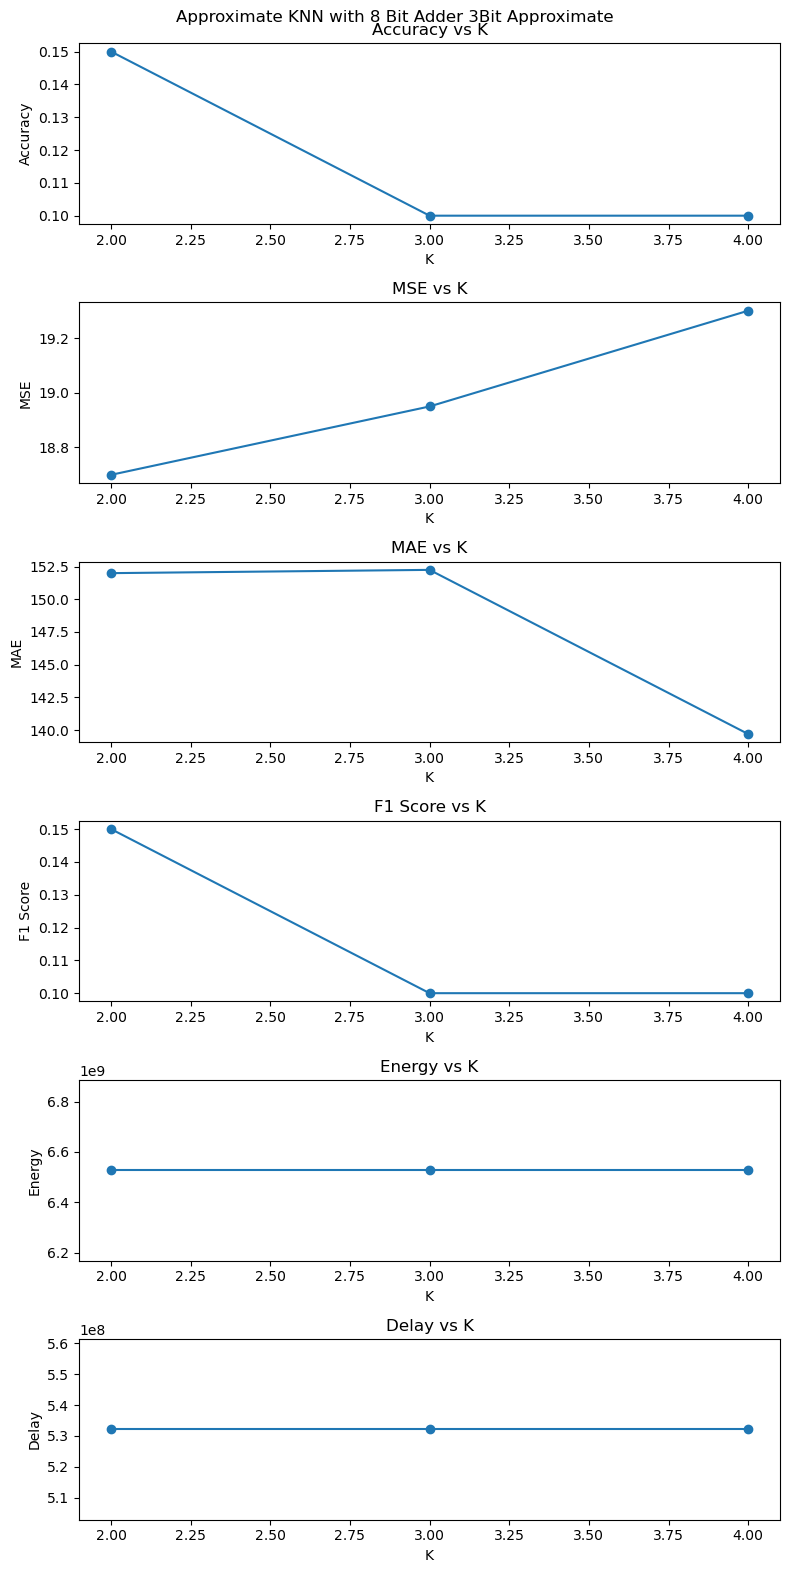

In [16]:
# Extract the metrics from the results
acc_values_exact = [result[0] for result in results_exact]
mse_values_exact = [result[1] for result in results_exact]
mae_values_exact = [result[2] for result in results_exact]
f1_values_exact = [result[3] for result in results_exact]
energy_values_exact = [result[4] for result in results_exact]
delay_values_exact = [result[5] for result in results_exact]

# Create a figure and set the title
fig = plt.figure(figsize=(8, 16))
fig.suptitle("Approximate KNN with 8 Bit Adder 3Bit Approximate")

# Create subplots
axs = fig.subplots(6, 1)

# Plot accuracy
axs[0].plot(kVals, acc_values_exact, marker='o')
axs[0].set_xlabel('K')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Accuracy vs K')

# Plot mean squared error
axs[1].plot(kVals, mse_values_exact, marker='o')
axs[1].set_xlabel('K')
axs[1].set_ylabel('MSE')
axs[1].set_title('MSE vs K')

# Plot mean absolute error
axs[2].plot(kVals, mae_values_exact, marker='o')
axs[2].set_xlabel('K')
axs[2].set_ylabel('MAE')
axs[2].set_title('MAE vs K')

# Plot F1 score
axs[3].plot(kVals, f1_values_exact, marker='o')
axs[3].set_xlabel('K')
axs[3].set_ylabel('F1 Score')
axs[3].set_title('F1 Score vs K')

axs[4].plot(kVals, np.divide(energy_values_exact,subset_size), marker='o')
axs[4].set_xlabel('K')
axs[4].set_ylabel('Energy')
axs[4].set_title('Energy vs K')

axs[5].plot(kVals, delay_values_exact, marker='o')
axs[5].set_xlabel('K')
axs[5].set_ylabel('Delay')
axs[5].set_title('Delay vs K')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Plot Approx Knn

ValueError: x and y must have same first dimension, but have shapes (3,) and (0,)

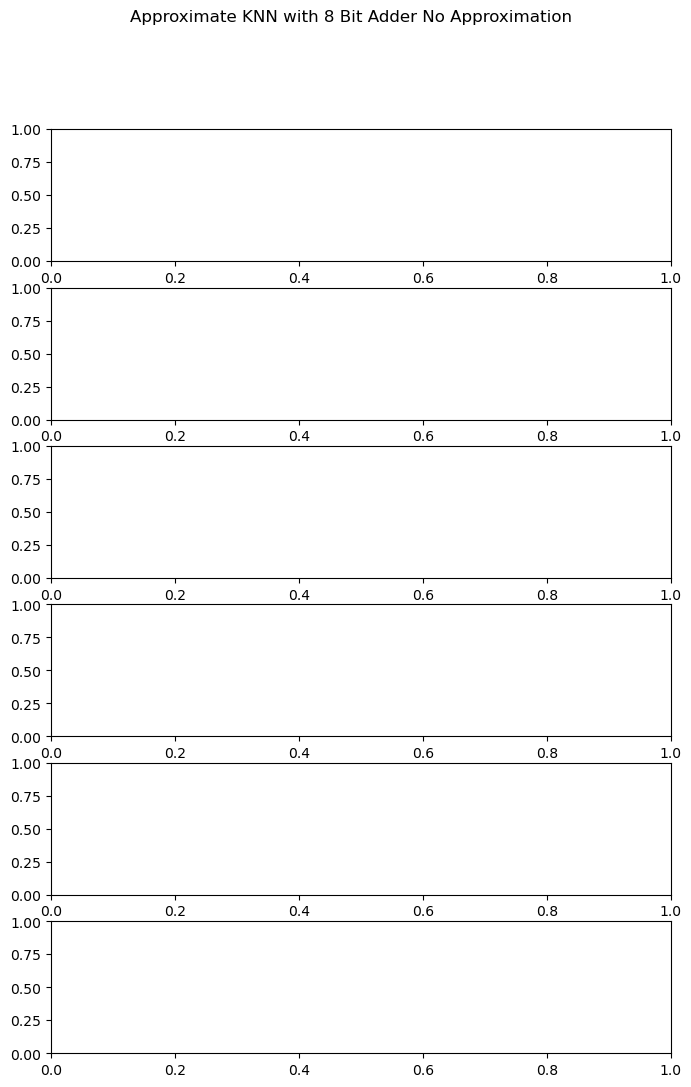

In [17]:
# Extract the metrics from the results
acc_values_approx = [result[0] for result in results_approx]
mse_values_approx = [result[1] for result in results_approx]
mae_values_approx = [result[2] for result in results_approx]
f1_values_approx = [result[3] for result in results_approx]
energy_values_approx = [result[4] for result in results_approx]
delay_values_approx = [result[5] for result in results_approx]

# Create a figure and set the title
fig = plt.figure(figsize=(8, 12))
fig.suptitle("Approximate KNN with 8 Bit Adder No Approximation")

# Create subplots
axs = fig.subplots(6, 1)

# Plot accuracy
axs[0].plot(kVals, acc_values_approx, marker='o')
axs[0].set_xlabel('K')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Accuracy vs K')

# Plot mean squared error
axs[1].plot(kVals, mse_values_approx, marker='o')
axs[1].set_xlabel('K')
axs[1].set_ylabel('MSE')
axs[1].set_title('MSE vs K')

# Plot mean absolute error
axs[2].plot(kVals, mae_values_approx, marker='o')
axs[2].set_xlabel('K')
axs[2].set_ylabel('MAE')
axs[2].set_title('MAE vs K')

# Plot F1 score
axs[3].plot(kVals, f1_values_approx, marker='o')
axs[3].set_xlabel('K')
axs[3].set_ylabel('F1 Score')
axs[3].set_title('F1 Score vs K')

axs[4].plot(kVals, np.divide(energy_values_approx,subset_size), marker='o')
axs[4].set_xlabel('K')
axs[4].set_ylabel('Energy')
axs[4].set_title('Energy in pJ vs K')

axs[5].plot(kVals, delay_values_approx, marker='o')
axs[5].set_xlabel('K')
axs[5].set_ylabel('Delay')
axs[5].set_title('Delay vs K')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


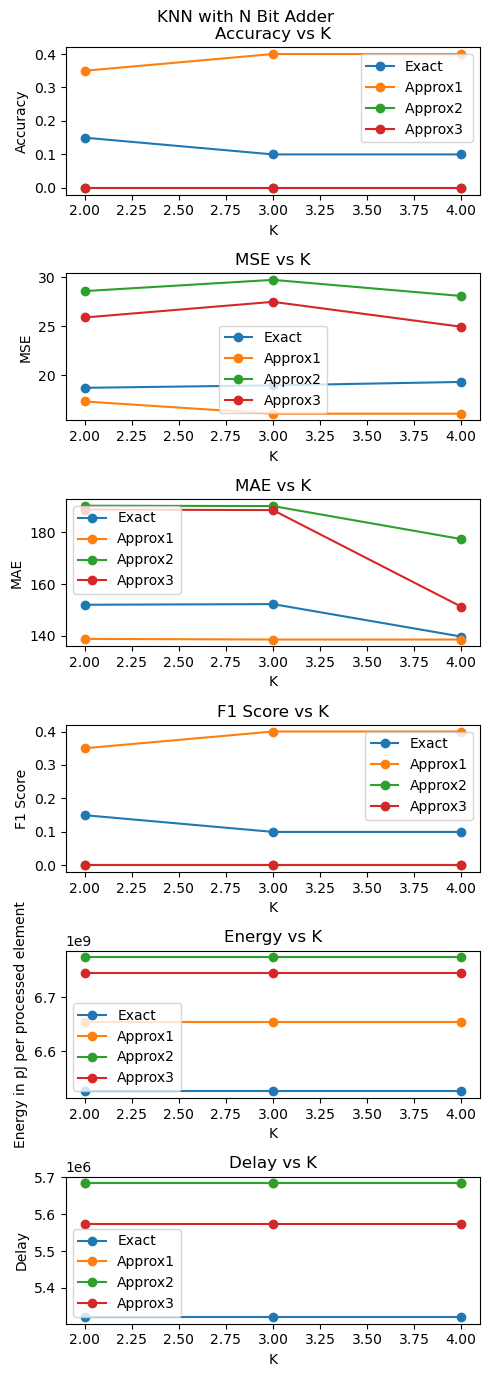

In [23]:
# Extract the metrics from the results
acc_values_exact = [result[0] for result in results_exact]
mse_values_exact = [result[1] for result in results_exact]
mae_values_exact = [result[2] for result in results_exact]
f1_values_exact = [result[3] for result in results_exact]
energy_values_exact = [result[4] for result in results_exact]
delay_values_exact = [result[5] for result in results_exact]

acc_values_approx = [result[0] for result in results_approx1]
mse_values_approx = [result[1] for result in results_approx1]
mae_values_approx = [result[2] for result in results_approx1]
f1_values_approx = [result[3] for result in results_approx1]
energy_values_approx = [result[4] for result in results_approx1]
delay_values_approx = [result[5] for result in results_approx1]

acc_values_approx2 = [result[0] for result in results_approx2]
mse_values_approx2 = [result[1] for result in results_approx2]
mae_values_approx2 = [result[2] for result in results_approx2]
f1_values_approx2 = [result[3] for result in results_approx2]
energy_values_approx2 = [result[4] for result in results_approx2]
delay_values_approx2 = [result[5] for result in results_approx2]

acc_values_approx3 = [result[0] for result in results_approx3]
mse_values_approx3 = [result[1] for result in results_approx3]
mae_values_approx3 = [result[2] for result in results_approx3]
f1_values_approx3 = [result[3] for result in results_approx3]
energy_values_approx3 = [result[4] for result in results_approx3]
delay_values_approx3 = [result[5] for result in results_approx3]

# Create a figure and set the title
fig = plt.figure(figsize=(5, 14))
fig.suptitle("KNN with N Bit Adder")

# Create subplots
axs = fig.subplots(6, 1)

# Plot accuracy
axs[0].plot(kVals, acc_values_exact, marker='o', label='Exact')
axs[0].plot(kVals, acc_values_approx, marker='o', label='Approx1 ')
axs[0].plot(kVals, acc_values_approx2, marker='o', label='Approx2 ')
axs[0].plot(kVals, acc_values_approx3, marker='o', label='Approx3 ')

axs[0].set_xlabel('K')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Accuracy vs K')
axs[0].legend()

# Plot mean squared error
axs[1].plot(kVals, mse_values_exact, marker='o', label='Exact')
axs[1].plot(kVals, mse_values_approx, marker='o', label='Approx1')
axs[1].plot(kVals, mse_values_approx2, marker='o', label='Approx2')
axs[1].plot(kVals, mse_values_approx3, marker='o', label='Approx3')
axs[1].set_xlabel('K')
axs[1].set_ylabel('MSE')
axs[1].set_title('MSE vs K')
axs[1].legend()

# Plot mean absolute error
axs[2].plot(kVals, mae_values_exact, marker='o', label='Exact')
axs[2].plot(kVals, mae_values_approx, marker='o', label='Approx1')
axs[2].plot(kVals, mae_values_approx2, marker='o', label='Approx2')
axs[2].plot(kVals, mae_values_approx3, marker='o', label='Approx3')
axs[2].set_xlabel('K')
axs[2].set_ylabel('MAE')
axs[2].set_title('MAE vs K')
axs[2].legend()

# Plot F1 score
axs[3].plot(kVals, f1_values_exact, marker='o', label='Exact')
axs[3].plot(kVals, f1_values_approx, marker='o', label='Approx1')
axs[3].plot(kVals, f1_values_approx2, marker='o', label='Approx2')
axs[3].plot(kVals, f1_values_approx3, marker='o', label='Approx3')
axs[3].set_xlabel('K')
axs[3].set_ylabel('F1 Score')
axs[3].set_title('F1 Score vs K')
axs[3].legend()

# Plot energy
axs[4].plot(kVals, np.divide(energy_values_exact,subset_size), marker='o', label='Exact')
axs[4].plot(kVals, np.divide(energy_values_approx,subset_size), marker='o', label='Approx1')
axs[4].plot(kVals, np.divide(energy_values_approx2,subset_size), marker='o', label='Approx2')
axs[4].plot(kVals, np.divide(energy_values_approx3,subset_size), marker='o', label='Approx3')
axs[4].set_xlabel('K')
axs[4].set_ylabel('Energy in pJ per processed element')
axs[4].set_title('Energy vs K')
axs[4].legend()

# Plot delay
axs[5].plot(kVals, np.divide(delay_values_exact,subset_size), marker='o', label='Exact')
axs[5].plot(kVals, np.divide(delay_values_approx,subset_size), marker='o', label='Approx1')
axs[5].plot(kVals, np.divide(delay_values_approx2,subset_size), marker='o', label='Approx2')
axs[5].plot(kVals, np.divide(delay_values_approx3,subset_size), marker='o', label='Approx3')



axs[5].set_xlabel('K')
axs[5].set_ylabel('Delay')
axs[5].set_title('Delay vs K')
axs[5].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

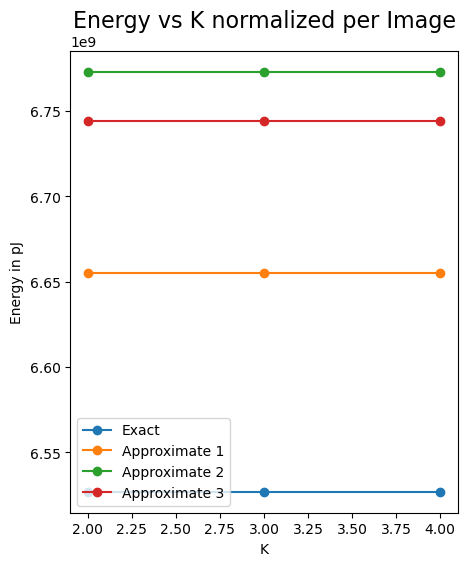

In [27]:
import matplotlib.pyplot as plt

# Assuming energy_values_approx is defined and has the same length as energy_values_exact and kVals
# energy_values_approx = [...]

plt.figure(figsize=(5, 6))

# Plot energy for exact values
plt.plot(kVals, np.divide(energy_values_exact,subset_size), marker='o', label='Exact')

# Plot energy for approximate values
plt.plot(kVals, np.divide(energy_values_approx,subset_size), marker='o', label='Approximate 1')
plt.plot(kVals, np.divide(energy_values_approx2,subset_size), marker='o', label='Approximate 2')
plt.plot(kVals, np.divide(energy_values_approx3,subset_size), marker='o', label='Approximate 3')


plt.xlabel('K')
plt.ylabel('Energy in pJ')
plt.title('Energy vs K normalized per Image' , fontsize=16)
plt.legend()

plt.show()

## Save results to file

In [ ]:
import pickle

pickle.dump(results, open("results.pkl", "wb"))

NameError: name 'results' is not defined

## Load results from file

In [ ]:
import pickle

results= pickle.load(open("results.pkl", "rb"))

In [ ]:
# Measuremments


## Plot energy consumption